<a href="https://colab.research.google.com/github/aabarzu/Coding-Dojo/blob/main/EjercicioSobreRNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical


In [100]:
def CargaDatos(filename):
  
  extension = filename[filename.find('.')+1:]
  path = "/content/drive/MyDrive/CodingDojo/DataScience/PandasForDataManipulation/Datos/"

  filename = path + filename
  if extension.lower() == 'csv':
      df = pd.read_csv(filename)   # csv
  
  if extension.lower() == 'xlsx':
      df = pd.read_excel(filename) # Excel

  return df


In [101]:
filename = 'fashion-mnist_train.csv'    

df = CargaDatos(filename)

In [102]:
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,60000.0,4.500000,2.872305,0.0,2.0,4.5,7.0,9.0
pixel1,60000.0,0.000900,0.094689,0.0,0.0,0.0,0.0,16.0
pixel2,60000.0,0.006150,0.271011,0.0,0.0,0.0,0.0,36.0
pixel3,60000.0,0.035333,1.222324,0.0,0.0,0.0,0.0,226.0
pixel4,60000.0,0.101933,2.452871,0.0,0.0,0.0,0.0,164.0
...,...,...,...,...,...,...,...,...
pixel780,60000.0,17.911483,45.149388,0.0,0.0,0.0,0.0,255.0
pixel781,60000.0,8.520633,29.614859,0.0,0.0,0.0,0.0,255.0
pixel782,60000.0,2.753300,17.397652,0.0,0.0,0.0,0.0,255.0
pixel783,60000.0,0.855517,9.356960,0.0,0.0,0.0,0.0,255.0


In [104]:
df.shape


(60000, 785)

In [105]:
X = df.drop(columns=['label']).values/255
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [106]:
y = df['label'].values

In [107]:
# Obtener datos: ya está dividido en conjuntos de entrenamiento y prueba
# División entrenamiento prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [108]:
X_train.shape

(45000, 784)

In [109]:
# Reformar datos
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [110]:
# Paso 1: Definir nuestra estructura de red
# Guardar la forma de entrada
input_shape = X_train.shape[1:4]
input_shape

(28, 28, 1)

In [111]:
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [88]:
# Modelo secuencial
model = Sequential()

In [112]:
# Capa convolucional
model.add(Conv2D(filters = 8, # Cuantos filtros quieres usar
                 kernel_size = 3, # tamaño de cada filtro
                 input_shape = input_shape)) # ¿Cuál es la forma de tus características de entrada (definimos esto arriba)
# Pooling layer
model.add(MaxPooling2D(pool_size = 2)) # Tamaño de pooling
# Capa de aplanamiento
model.add(Flatten())
# Capa de salida
model.add(Dense(10, # Cuantas posibilidades de salida tenemos
                activation = 'softmax')) # ¿Qué función de activación estás usando?

ValueError: ignored

In [117]:
# Paso 2: compilar
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc','accuracy'])

In [118]:
# Paso 3: ajustar nuestro modelo
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=20)

Epoch 1/20
1407/1407 [==============================] - 15s 10ms/step - loss: 0.2019 - acc: 0.9278 - accuracy: 0.9278 - val_loss: 0.3165 - val_acc: 0.8953 - val_accuracy: 0.8953
Epoch 2/20
1407/1407 [==============================] - 14s 10ms/step - loss: 0.2003 - acc: 0.9283 - accuracy: 0.9283 - val_loss: 0.3197 - val_acc: 0.8920 - val_accuracy: 0.8920
Epoch 3/20
1407/1407 [==============================] - 14s 10ms/step - loss: 0.1980 - acc: 0.9290 - accuracy: 0.9290 - val_loss: 0.3274 - val_acc: 0.8910 - val_accuracy: 0.8910
Epoch 4/20
1407/1407 [==============================] - 16s 11ms/step - loss: 0.1985 - acc: 0.9284 - accuracy: 0.9284 - val_loss: 0.3318 - val_acc: 0.8893 - val_accuracy: 0.8893
Epoch 5/20
1407/1407 [==============================] - 14s 10ms/step - loss: 0.1963 - acc: 0.9302 - accuracy: 0.9302 - val_loss: 0.3276 - val_acc: 0.8923 - val_accuracy: 0.8923
Epoch 6/20
1407/1407 [==============================] - 14s 10ms/step - loss: 0.1952 - acc: 0.9298 - accuracy:

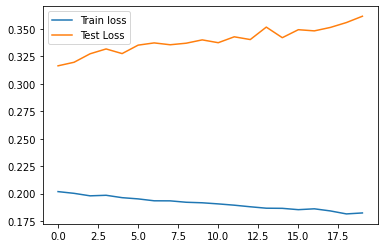

In [119]:
# Visualizar la pérdida
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

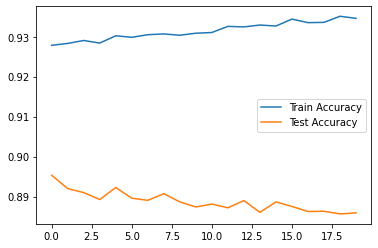

In [120]:
# Visualizar la precisión
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.legend();

In [121]:
filename = 'fashion-mnist_test.csv'    

df2 = CargaDatos(filename)

df2

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [129]:
class_names = ["Polera/top", "Pantalón", "Suéter", "Vestido", "Abrigo",
               "Sandalia", "Camisa", "Zapatilla", "Bolso", "Botín"] # 10 clases

In [132]:
X_full = df2.drop(columns=['label']).values /255 
X_full

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.00392157,
        0.        ],
       [0.        , 0.00392157, 0.01176471, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [139]:
y_full = df2['label'].values

In [140]:
y_full

array([0, 1, 2, ..., 8, 8, 1])

In [143]:
y_full.shape

(10000,)

In [134]:
X_full.shape

(10000, 784)

In [136]:
X_full = X_full.reshape(X_full.shape[0], 28, 28, 1)
X_full.shape

(10000, 28, 28, 1)

In [157]:
dato = 9997

for dato in range(1,100,1):

  prediction = model.predict(X_full)
  classes_x = np.argmax(prediction,axis=1)
  print("Predicción:", class_names[classes_x[dato]])
  print("Clase Real:", class_names[y_full[dato]])
  print("\n")


Predicción: Pantalón
Clase Real: Pantalón


Predicción: Suéter
Clase Real: Suéter


Predicción: Camisa
Clase Real: Suéter


Predicción: Vestido
Clase Real: Vestido


Predicción: Camisa
Clase Real: Suéter


Predicción: Bolso
Clase Real: Bolso


Predicción: Camisa
Clase Real: Camisa


Predicción: Sandalia
Clase Real: Sandalia


Predicción: Polera/top
Clase Real: Polera/top


Predicción: Vestido
Clase Real: Vestido


Predicción: Camisa
Clase Real: Abrigo


Predicción: Abrigo
Clase Real: Abrigo


Predicción: Camisa
Clase Real: Camisa


Predicción: Bolso
Clase Real: Bolso


Predicción: Sandalia
Clase Real: Sandalia


Predicción: Camisa
Clase Real: Camisa


Predicción: Vestido
Clase Real: Vestido


Predicción: Camisa
Clase Real: Camisa


Predicción: Abrigo
Clase Real: Abrigo


Predicción: Abrigo
Clase Real: Abrigo


Predicción: Abrigo
Clase Real: Abrigo


Predicción: Suéter
Clase Real: Suéter


Predicción: Pantalón
Clase Real: Pantalón


Predicción: Sandalia
Clase Real: Sandalia


Predicción

In [156]:
y_full.shape[0]

10000

In [147]:
prediction

array([[9.9921525e-01, 1.0690565e-16, 2.1364781e-06, ..., 5.3874936e-20,
        4.8193290e-11, 2.6304907e-32],
       [7.3872187e-08, 9.9999952e-01, 4.5546023e-10, ..., 1.6310616e-14,
        3.7204367e-10, 7.3448296e-12],
       [1.8731559e-02, 1.0723850e-10, 7.3512322e-01, ..., 2.7204388e-14,
        4.7544130e-12, 3.6432889e-17],
       ...,
       [1.2658972e-18, 1.3782289e-18, 1.7853691e-13, ..., 4.3694231e-25,
        1.0000000e+00, 2.1552226e-24],
       [8.7664589e-02, 4.0832789e-12, 3.0323470e-08, ..., 5.7652477e-12,
        8.7219244e-01, 8.9085592e-14],
       [1.8133123e-07, 9.9999917e-01, 9.3159002e-08, ..., 2.1071655e-18,
        4.9030946e-10, 2.3092385e-21]], dtype=float32)

In [148]:
np.argmax(prediction,axis=1)

array([0, 1, 2, ..., 8, 8, 1])